# Examples for Paper
This notebook generates variations of the MRS datasets that are used for the results in the paper.

**NOTE:** Some path names need to be changed in order to run this correctly on your own device!

In [1]:
# Manually adjust the bounding box
left_offset = -1.2  # Reduce space on the left
right_offset = 0.4  # Add space on the right
bottom_offset = -0.55  # Reduce space below
top_offset = 0.4  # Add space above


# Lipid Bleeds

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

Spectral simulation completed!
Create figure for bleed: 0...


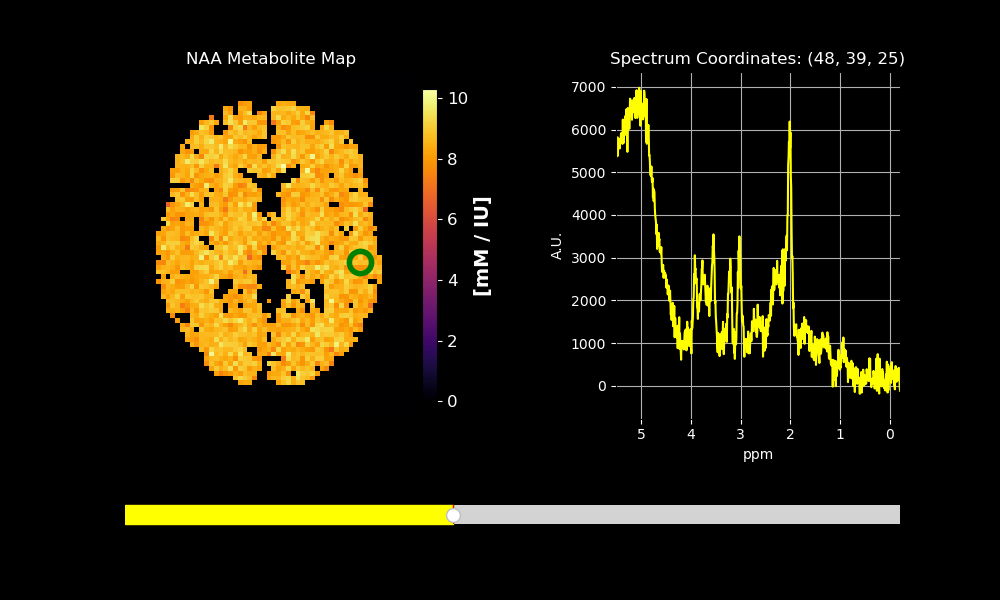

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

Spectral simulation completed!
Create figure for bleed: 2.5...


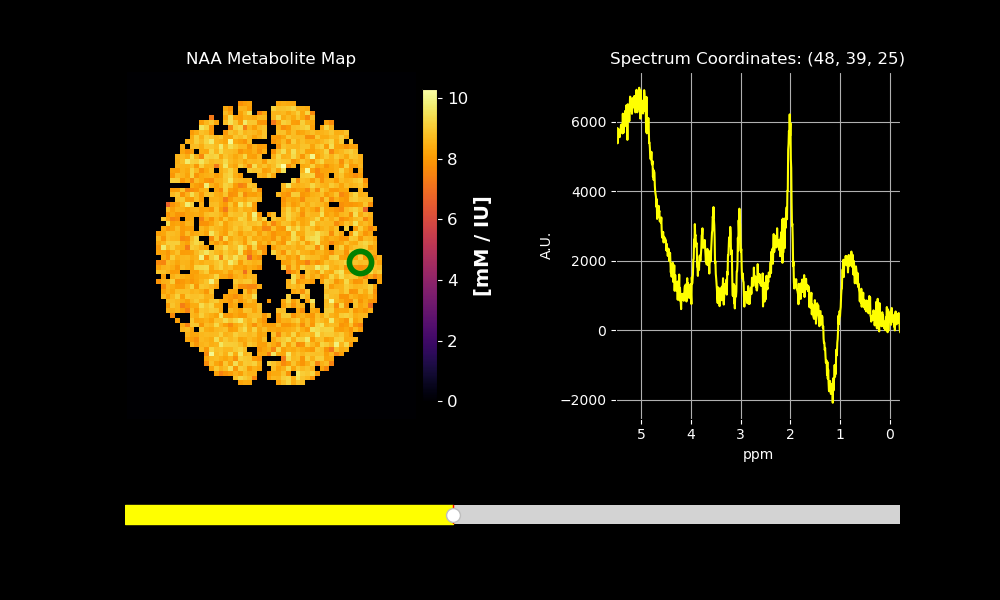

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

Spectral simulation completed!
Create figure for bleed: 3.0...


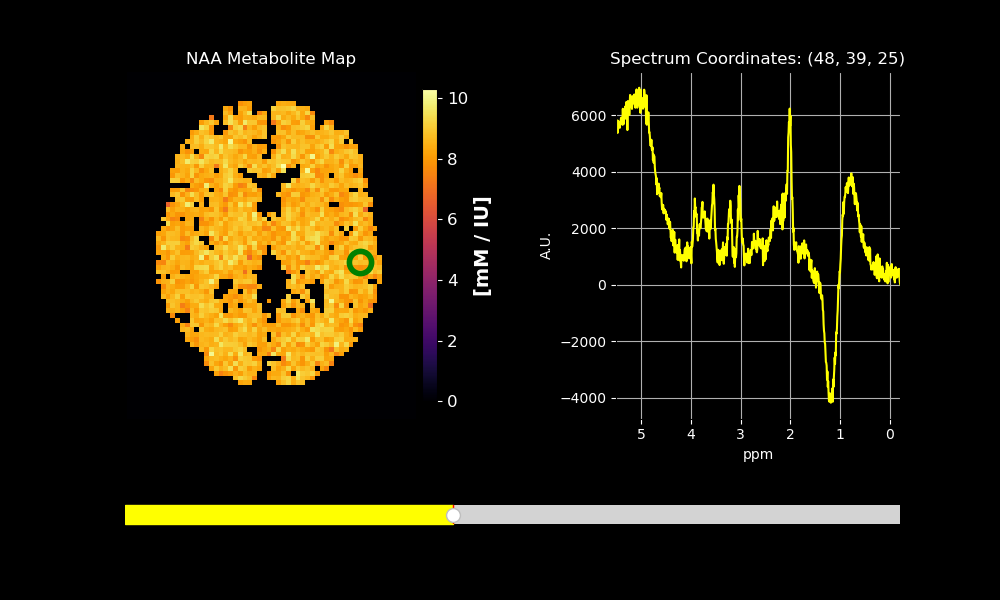

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

Spectral simulation completed!
Create figure for bleed: 5.0...


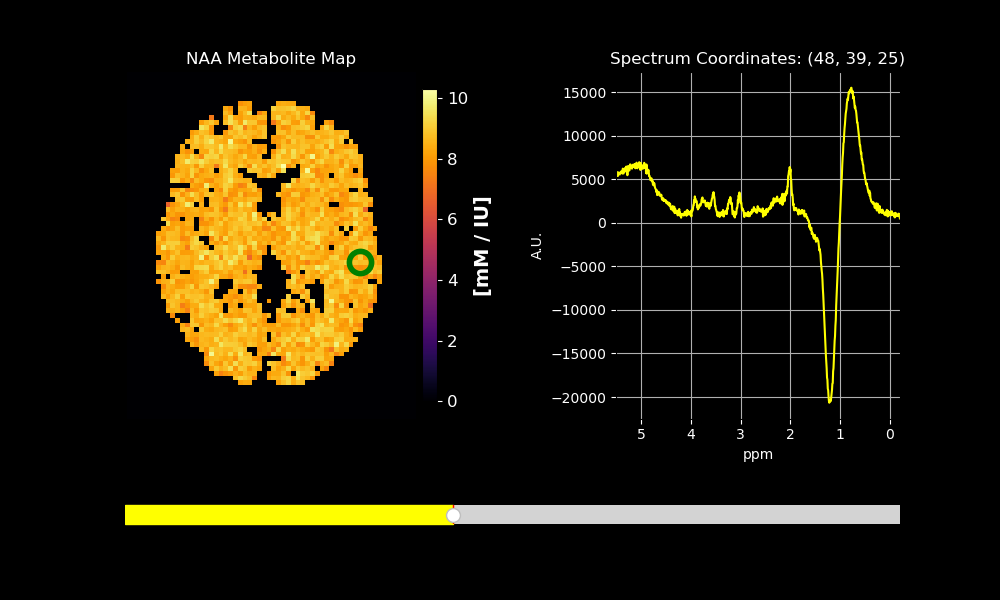

In [2]:
# Imports
import numpy as np
import random
%matplotlib widget

# Own libraries
from preprocessing.preprocess_df import create_metab_df

from DigitalPhantom import DigitalPhantom

from simulation.basis import Basis
from simulation.signalModels import SignalModel
from simulation.simulation import simulate_spectra

from utils.auxillary import downsample_mrsi, save_nifti_mrsi, downsample_metab_map, timer
from utils.visualizations import plot_metabolite_map, plot_mrsi

bleeds = [0, 2.5, 3.0, 5.0]

for bleed in bleeds:

    # Set random seed
    random_seed = 96
    np.random.seed(random_seed)
    random.seed(random_seed)

    phantom = DigitalPhantom(
        # General settings
        skeleton='MRiLab', 
        resolution=3.0, 
        path2phantom='./data/phantom/', 
        path2metabs='./data/metabolites/',
        from_scratch=False,
        # Metabolite settings
        concs_std=0.05,
        # Lipid settings
        sigma_lipid_spread=bleed, 
        # Gradient settings
        grad_metabs=[], 
        grad_settings=[0.5, 2, '+y']
        )
    
    map_name = 'NAA'
    path2basis = './data/Basissets/3T/Philips_TE30_PRESS_pMMupdated.mat'
    phantom_metabs = list(phantom.metab_mapping.keys())

    basis = Basis(path2basis, fmt='osprey', bw=2000, points=2048, metabs=[], phantom_metabs=phantom_metabs)
    signalModel = SignalModel(basis, gauss_broadening=15, mm_scale=1000, noise_std=200, res_water_scale=5, lipid_scale=10, baseline_order=2, baseline_scale=400)
    ppm_axis, spectra = simulate_spectra(phantom, basis, sigModel=signalModel, metabs=[], slice_range=[25,26], batch_size=500)

    metab_map = phantom.create_metab_map(metab=map_name)
    
    print(f"Create figure for bleed: {bleed}...")
    fig, axs = plot_mrsi(spectra, metab_map, ppm_axis, metab_name=map_name, slice_idx=25, start_x=48, start_y=39)
    
    # Only save the spectra in ax[1]
    extent = axs[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    extent = extent.padded(0)
    extent.x0 += left_offset
    extent.x1 += right_offset
    extent.y0 += bottom_offset
    extent.y1 += top_offset

    # Change the title of the second axis
    axs[1].set_title(f'Sigma Lipid Spread: {bleed}', fontsize=16)
    # Increase font size of the axes labels
    axs[1].set_xlabel('ppm', fontsize=16)
    axs[1].set_ylabel('A.U.', fontsize=16)
    # Increase font size of the ticks
    axs[1].tick_params(axis='both', which='major', labelsize=12)

    # Save the figure with bbox_inches set to the axis extent
    fig.savefig(f'./Paper/Figures/png/Examples/bleed_{bleed}.png', bbox_inches=extent, dpi=300)

# Save one example of the metabolite map (ax[0] in the figure)
extent = axs[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent = extent.padded(0)
extent.x0 += -0.5
extent.x1 += 0.9
extent.y0 += -0.4
extent.y1 += 0.4
fig.savefig(f'./Paper/Figures/png/Examples/metab_map.png', bbox_inches=extent, dpi=300)

# Residual Water

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

Spectral simulation completed!
Create figure for res_water_scale: 0...


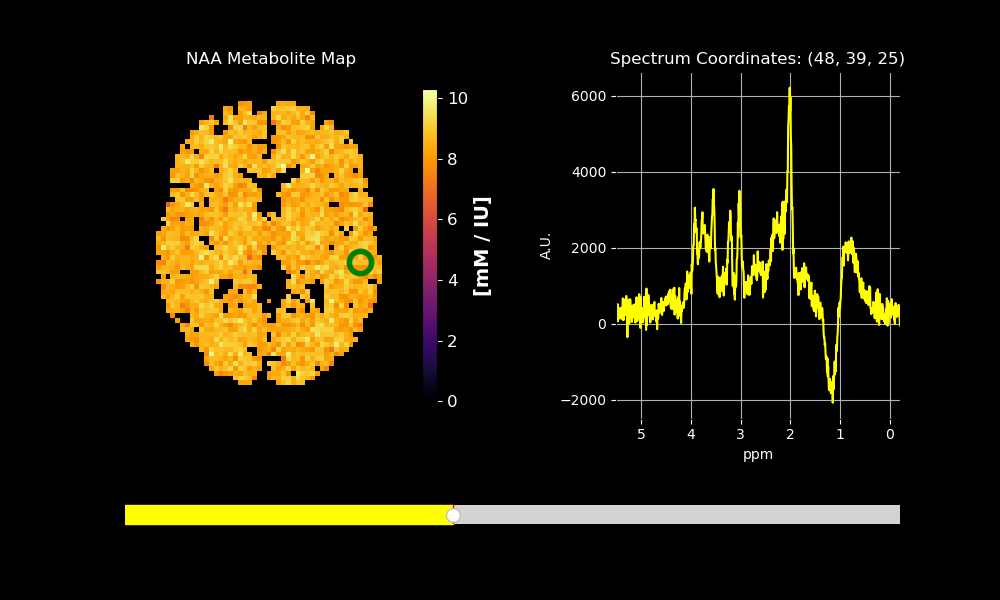

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

Spectral simulation completed!
Create figure for res_water_scale: 2.5...


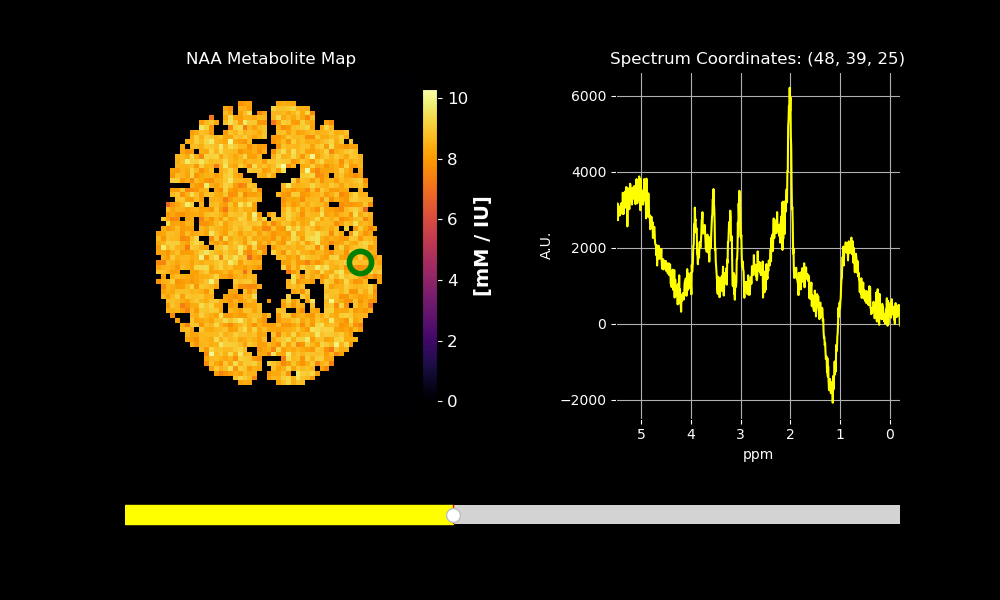

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

Spectral simulation completed!
Create figure for res_water_scale: 5.0...


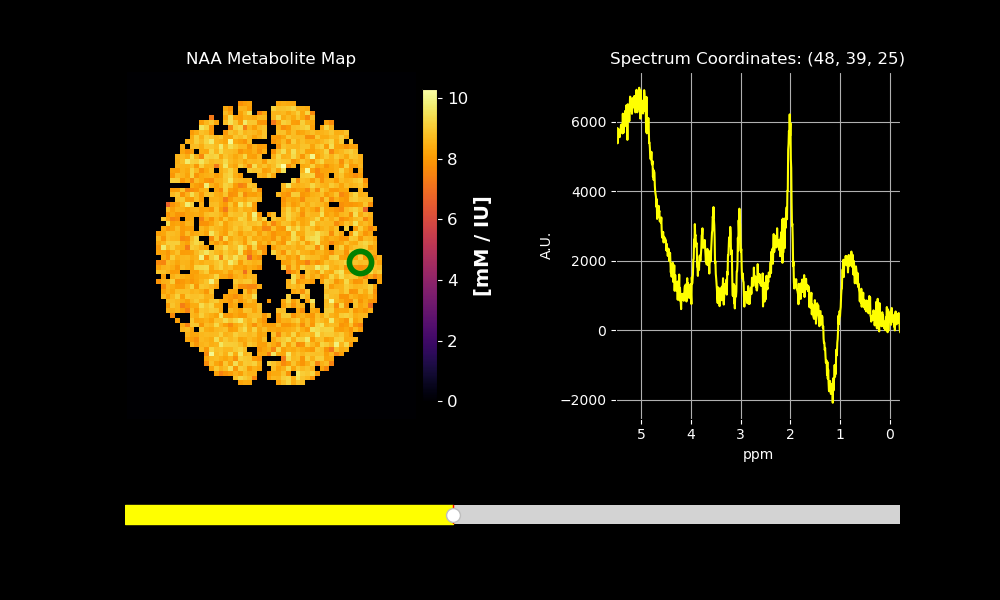

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

Spectral simulation completed!
Create figure for res_water_scale: 8.0...


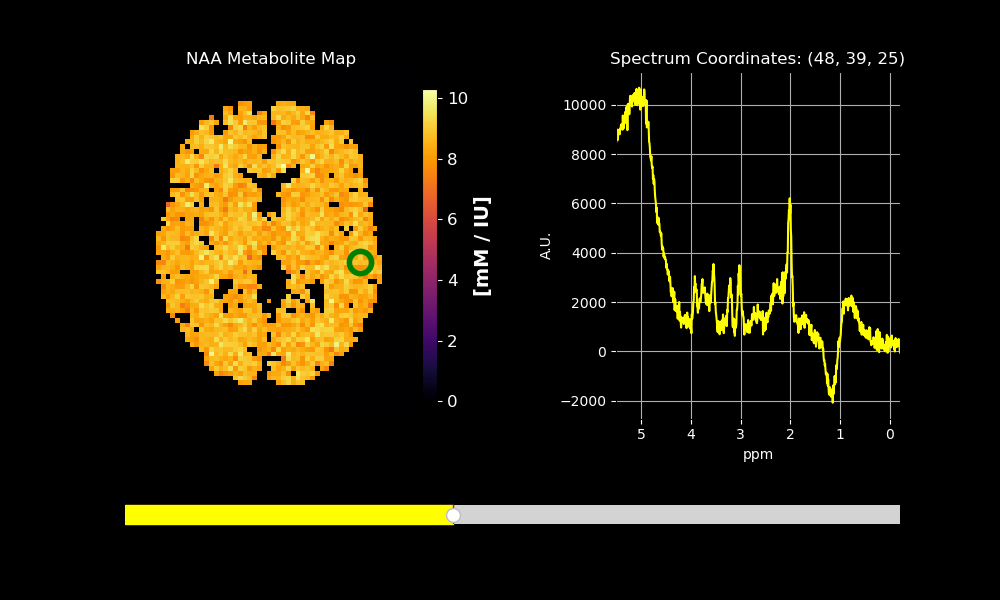

In [3]:
# Imports
import numpy as np
import random
%matplotlib widget

# Own libraries
from preprocessing.preprocess_df import create_metab_df

from DigitalPhantom import DigitalPhantom

from simulation.basis import Basis
from simulation.signalModels import SignalModel
from simulation.simulation import simulate_spectra

from utils.auxillary import downsample_mrsi, save_nifti_mrsi, downsample_metab_map, timer
from utils.visualizations import plot_metabolite_map, plot_mrsi

res_water_scales = [0, 2.5, 5.0, 8.0]

for scale in res_water_scales:

    # Set random seed
    random_seed = 96
    np.random.seed(random_seed)
    random.seed(random_seed)

    phantom = DigitalPhantom(
        # General settings
        skeleton='MRiLab', 
        resolution=3.0, 
        path2phantom='./data/phantom/', 
        path2metabs='./data/metabolites/',
        from_scratch=False,
        # Metabolite settings
        concs_std=0.05,
        # Lipid settings
        sigma_lipid_spread=2.5, 
        # Gradient settings
        grad_metabs=[], 
        grad_settings=[0.5, 2, '+y']
        )
    
    map_name = 'NAA'
    path2basis = './data/Basissets/3T/Philips_TE30_PRESS_pMMupdated.mat'
    phantom_metabs = list(phantom.metab_mapping.keys())

    basis = Basis(path2basis, fmt='osprey', bw=2000, points=2048, metabs=[], phantom_metabs=phantom_metabs)
    signalModel = SignalModel(basis, gauss_broadening=15, mm_scale=1000, noise_std=200, res_water_scale=scale, lipid_scale=10, baseline_order=2, baseline_scale=400)
    ppm_axis, spectra = simulate_spectra(phantom, basis, sigModel=signalModel, metabs=[], slice_range=[25,26], batch_size=500)

    metab_map = phantom.create_metab_map(metab=map_name)
    print(f"Create figure for res_water_scale: {scale}...")
    fig, axs = plot_mrsi(spectra, metab_map, ppm_axis, metab_name=map_name, slice_idx=25, start_x=48, start_y=39)
    
    # Only save the spectra in ax[1]
    extent = axs[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    extent = extent.padded(0)
    extent.x0 += left_offset
    extent.x1 += right_offset
    extent.y0 += bottom_offset
    extent.y1 += top_offset

    # change the title of the second axis
    axs[1].set_title(f'Residual Water Scale: {scale}', fontsize=16)
    # Increase font size of the axes labels
    axs[1].set_xlabel('ppm', fontsize=16)
    axs[1].set_ylabel('A.U.', fontsize=16)
    # Increase font size of the ticks
    axs[1].tick_params(axis='both', which='major', labelsize=12)

    # Save the figure with bbox_inches set to the axis extent
    fig.savefig(f'./Paper/Figures/png/Examples/res_water_scale_{scale}.png', bbox_inches=extent, dpi=300)


# Noise

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

Spectral simulation completed!
Create figure for noise_std: 0...


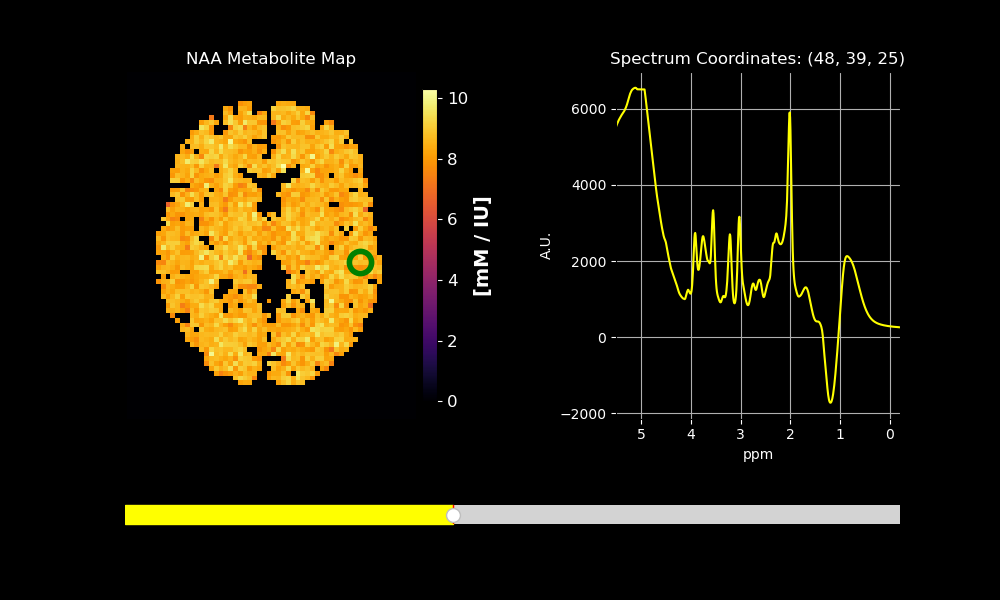

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

Spectral simulation completed!
Create figure for noise_std: 200...


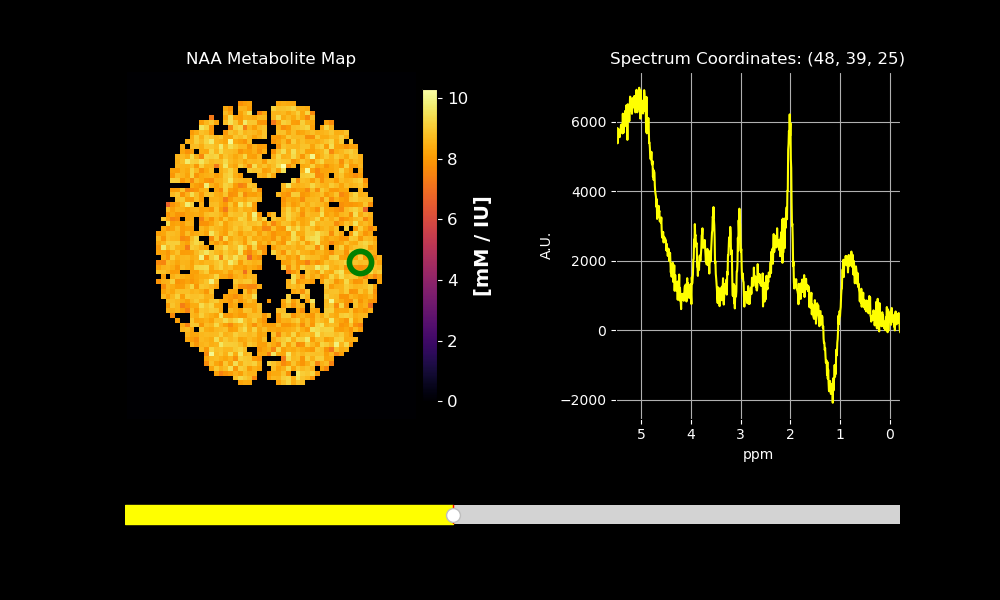

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

Spectral simulation completed!
Create figure for noise_std: 500...


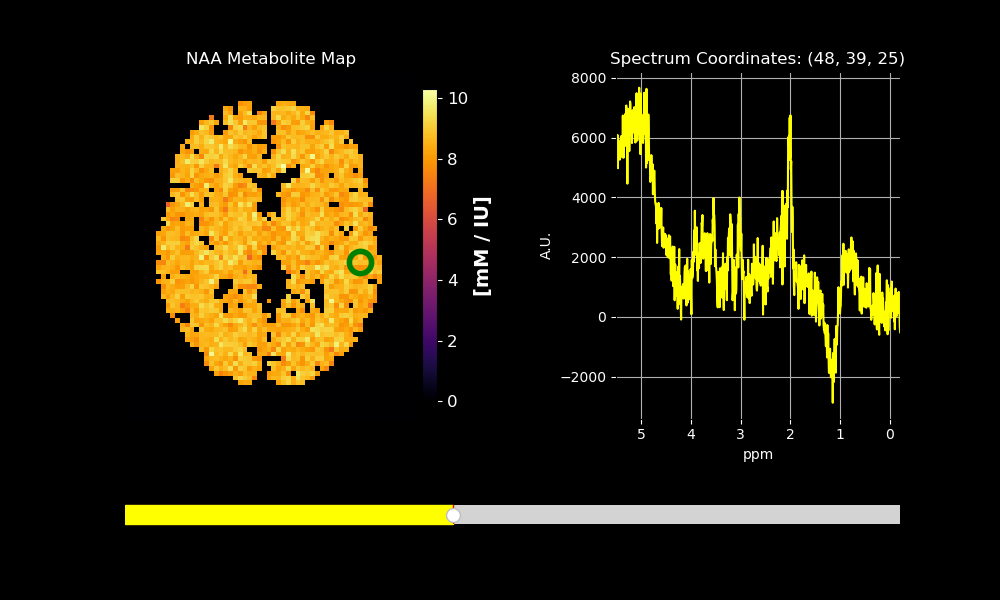

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

Spectral simulation completed!
Create figure for noise_std: 1000...


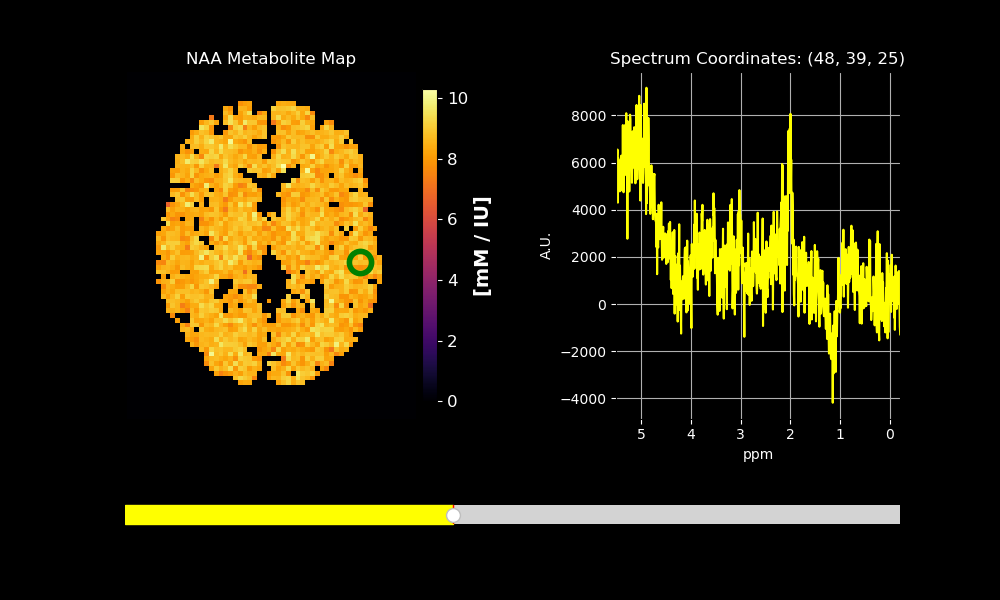

In [4]:
# Imports
import numpy as np
import random
%matplotlib widget

# Own libraries
from preprocessing.preprocess_df import create_metab_df

from DigitalPhantom import DigitalPhantom

from simulation.basis import Basis
from simulation.signalModels import SignalModel
from simulation.simulation import simulate_spectra

from utils.auxillary import downsample_mrsi, save_nifti_mrsi, downsample_metab_map, timer
from utils.visualizations import plot_metabolite_map, plot_mrsi

noise_stds = [0, 200, 500, 1000]

for std in noise_stds:

    # Set random seed
    random_seed = 96
    np.random.seed(random_seed)
    random.seed(random_seed)

    phantom = DigitalPhantom(
        # General settings
        skeleton='MRiLab', 
        resolution=3.0, 
        path2phantom='./data/phantom/', 
        path2metabs='./data/metabolites/',
        from_scratch=False,
        # Metabolite settings
        concs_std=0.05,
        # Lipid settings
        sigma_lipid_spread=2.5, 
        # Gradient settings
        grad_metabs=[], 
        grad_settings=[0.5, 2, '+y']
        )
    
    map_name = 'NAA'
    path2basis = './data/Basissets/3T/Philips_TE30_PRESS_pMMupdated.mat'
    phantom_metabs = list(phantom.metab_mapping.keys())

    basis = Basis(path2basis, fmt='osprey', bw=2000, points=2048, metabs=[], phantom_metabs=phantom_metabs)
    signalModel = SignalModel(basis, gauss_broadening=15, mm_scale=1000, noise_std=std, res_water_scale=5, lipid_scale=10, baseline_order=2, baseline_scale=400)
    ppm_axis, spectra = simulate_spectra(phantom, basis, sigModel=signalModel, metabs=[], slice_range=[25,26], batch_size=500)

    metab_map = phantom.create_metab_map(metab=map_name)
    print(f"Create figure for noise_std: {std}...")
    fig, axs = plot_mrsi(spectra, metab_map, ppm_axis, metab_name=map_name, slice_idx=25, start_x=48, start_y=39)
    
    # Only save the spectra in ax[1]
    extent = axs[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    extent = extent.padded(0)
    extent.x0 += left_offset
    extent.x1 += right_offset
    extent.y0 += bottom_offset
    extent.y1 += top_offset

    # Change the title of the second axis
    axs[1].set_title(f'Noise Std: {std}', fontsize=16)
    # Increase font size of the axes labels
    axs[1].set_xlabel('ppm', fontsize=16)
    axs[1].set_ylabel('A.U.', fontsize=16)
    # Increase font size of the ticks
    axs[1].tick_params(axis='both', which='major', labelsize=12)

    fig.savefig(f'./Paper/Figures/png/Examples/noise_std_{std}.png', bbox_inches=extent, dpi=300)


# Gaussian Broadening

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

Spectral simulation completed!
Create figure for gauss_broadening: 0...


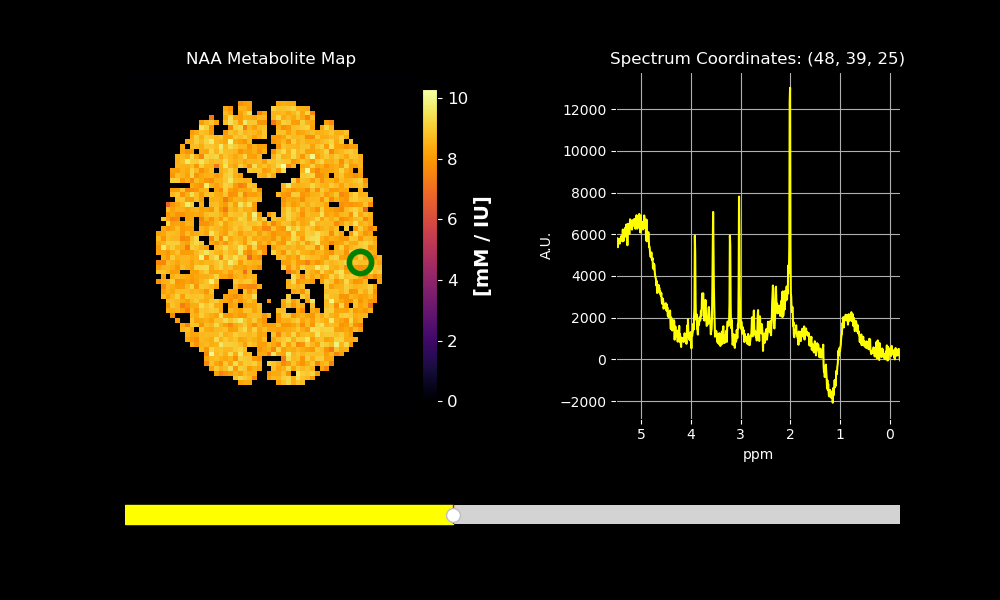

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

Spectral simulation completed!
Create figure for gauss_broadening: 15...


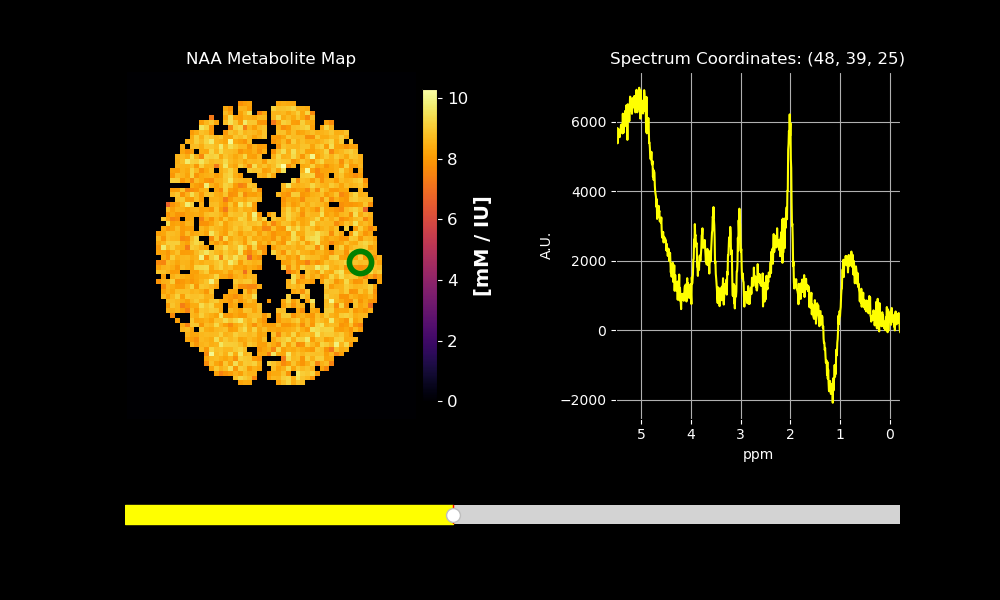

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

Spectral simulation completed!
Create figure for gauss_broadening: 30...


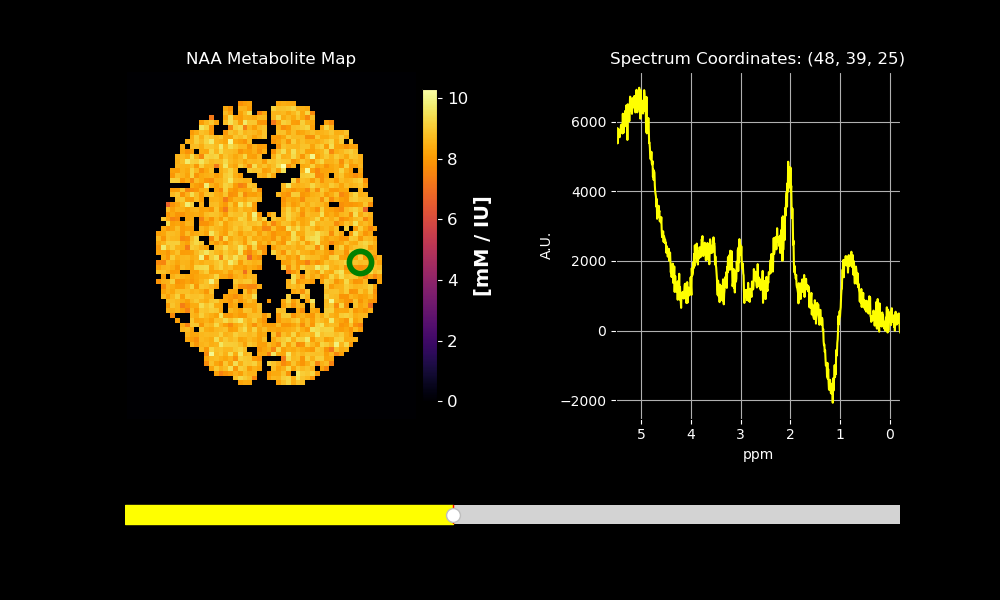

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!
There are metabolites in the data that are not present in the basis: ['Glc', 'NAA_Asp']
Removing these metabolites from the data...
Simulating spectra for 2277 voxels...


100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

Spectral simulation completed!
Create figure for gauss_broadening: 60...


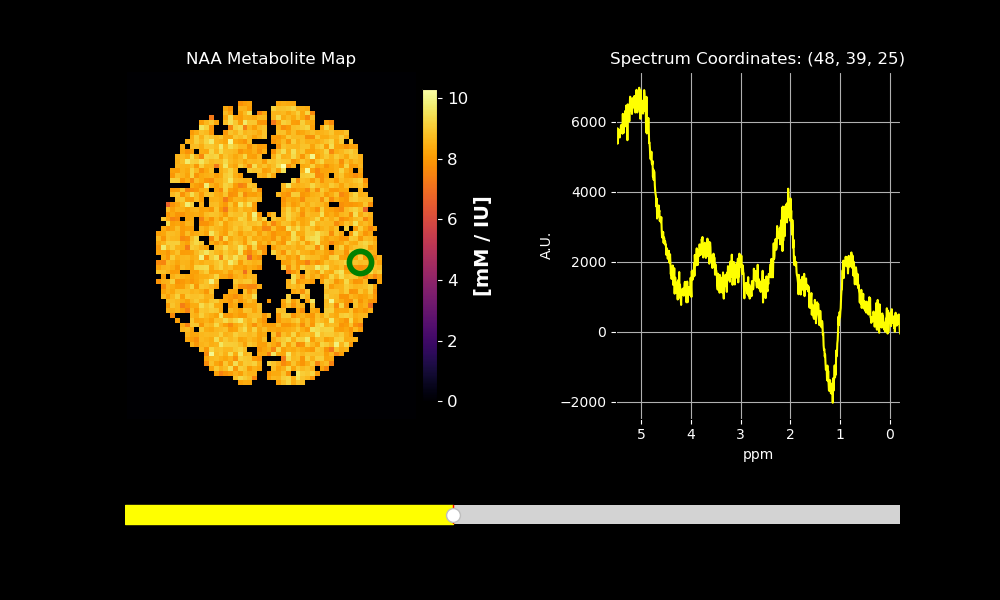

In [5]:
# Imports
import numpy as np
import random
%matplotlib widget

# Own libraries
from preprocessing.preprocess_df import create_metab_df

from DigitalPhantom import DigitalPhantom

from simulation.basis import Basis
from simulation.signalModels import SignalModel
from simulation.simulation import simulate_spectra

from utils.auxillary import downsample_mrsi, save_nifti_mrsi, downsample_metab_map, timer
from utils.visualizations import plot_metabolite_map, plot_mrsi

gauss_broads = [0, 15, 30, 60]

for gauss in gauss_broads:

    # Set random seed
    random_seed = 96
    np.random.seed(random_seed)
    random.seed(random_seed)

    phantom = DigitalPhantom(
        # General settings
        skeleton='MRiLab', 
        resolution=3.0, 
        path2phantom='./data/phantom/', 
        path2metabs='./data/metabolites/',
        from_scratch=False,
        # Metabolite settings
        concs_std=0.05,
        # Lipid settings
        sigma_lipid_spread=2.5, 
        # Gradient settings
        grad_metabs=[], 
        grad_settings=[0.5, 2, '+y']
        )
    
    map_name = 'NAA'
    path2basis = './data/Basissets/3T/Philips_TE30_PRESS_pMMupdated.mat'
    phantom_metabs = list(phantom.metab_mapping.keys())

    basis = Basis(path2basis, fmt='osprey', bw=2000, points=2048, metabs=[], phantom_metabs=phantom_metabs)
    signalModel = SignalModel(basis, gauss_broadening=gauss, mm_scale=1000, noise_std=200, res_water_scale=5, lipid_scale=10, baseline_order=2, baseline_scale=400)
    ppm_axis, spectra = simulate_spectra(phantom, basis, sigModel=signalModel, metabs=[], slice_range=[25,26], batch_size=500)

    metab_map = phantom.create_metab_map(metab=map_name)
    print(f"Create figure for gauss_broadening: {gauss}...")
    fig, axs = plot_mrsi(spectra, metab_map, ppm_axis, metab_name=map_name, slice_idx=25, start_x=48, start_y=39)
    
    # Only save the spectra in ax[1]
    extent = axs[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    extent = extent.padded(0)
    extent.x0 += left_offset
    extent.x1 += right_offset
    extent.y0 += bottom_offset
    extent.y1 += top_offset

    # Change the title of the second axis
    axs[1].set_title(f'Gauss Broadening: {gauss}', fontsize=16)
    # Increase font size of the axes labels
    axs[1].set_xlabel('ppm', fontsize=16)
    axs[1].set_ylabel('A.U.', fontsize=16)
    # Increase font size of the ticks
    axs[1].tick_params(axis='both', which='major', labelsize=12)

    fig.savefig(f'./Paper/Figures/png/Examples/gauss_broadening_{gauss}.png', bbox_inches=extent, dpi=300)
